<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- **Profesores:** Ignacio Meza, Sebastián Tinoco
- **Auxiliares:** Catherine Benavides, Consuelo Rojas
- **Ayudante:** Nicolás Ojeda, Eduardo Moya

### Equipo: **SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Sergio Rehbein
- Nombre de alumno 2: Matías Cornejo

\### **Link de repositorio de GitHub Matias:** https://github.com/s-kill/MDS7202

\### **Link de repositorio de GitHub Sergio:** https://github.com/sergiorehbein/MDS7201---Proyecto-de-Ciencia-de-Datos


## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [2]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# **Forecasting (3.0 puntos)**


## **Prophet, teoria**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **Prophet, práctica**

<center>
<img src ="https://static.wikia.nocookie.net/31minutos/images/d/d1/Don_Sergio.png/revision/latest?cb=20190926222900" width = 250 />

Don Sergio quiere entrenar para participar en la maratón y como sabe que correr una maratón requiere de entrenamiento y una dieta balanceada.

Por ello, necesita empezar a comer más balanceado, pero también necesita saber que tanto le va a costar esto, de manera de poder agregarlo a su presupuesto.

Es así como ustedes tendrán que ayudar a Don Sergio a cumplir su sueño de correr la maratón de Santiago, manteniendo su economía del hogar que comparte con su espora Emerilda.

**Datos**

Para poder ayudar a Don Sergio, harán uso del dataset `fruit_vegetables.csv`que contiente las siguientes columnas:

*   `SN:` Serial Number.
*   `Commodity:` Nombre de las frutas o verduras.
* `Date:` Fecha del registro.
* `Unit:` Unidad del precio.
* `Minumum:` Precio mínimo de venta.
* `Maximum:` Precio máximo de venta.
* `Average:` Precio promedio de venta.




In [3]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


### **1. Serie de Tiempo**


#### **1.1 Pre-procesamiento**

Tareas de la sección:


1.   Identificar elementos necesarios para generar la serie de tiempo.
2.   Gráficar datos.
3.   Ver la existencia de tendencias, estacionalidades o ruido.
4.   Dividir datos para tener set de entrenamiento (80%) y testeo (20%). Graficar.

---





**Comida de Don Sergio**

Don Sergio quiere nutricer lo mejor posible durante su tiempo de entrenamiento, por lo que necesita agregar más frutas y verduras a su dieta. Es por ello que decidío añadir los siguientes elementos a su compra diaria.

*   Tomates
*   Lechuga
*   Manzana
*   Plantanos
*   Tofu

**Nota:** Don Sergio prefiere comprar productos locales, compra un Kg diario de cada cosa y a precio promedio.

**Respuesta:**

In [4]:
# Leer el dataset
df= pd.read_csv("/content/fruit_vegetables.csv")

In [5]:
# Crear máscara con elementos de búsqueda y seleccionar

# Lista de productos
items = ["Tomato", "Lettuce", "Apple", "Banana", "Tofu"]

# Usamos productos locales también
mask = df['Commodity'].str.contains('|'.join(items), case=False) & df['Commodity'].str.contains('Local', case=False)

# Ffiltro usando la máscara
df_mask = df[mask]

In [6]:
# Agrupar por fecha en la columna average y sumar, obtener serie de tiempo

# Convertir la columna 'Date' a formato datetime
df_mask['Date'] = pd.to_datetime(df_mask['Date'])

# Agrupar por fecha y sumar los valores promedio
serie_tiempo = df_mask.groupby('Date')['Average'].sum().reset_index()


<ipython-input-6-6faded8dc461>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mask['Date'] = pd.to_datetime(df_mask['Date'])


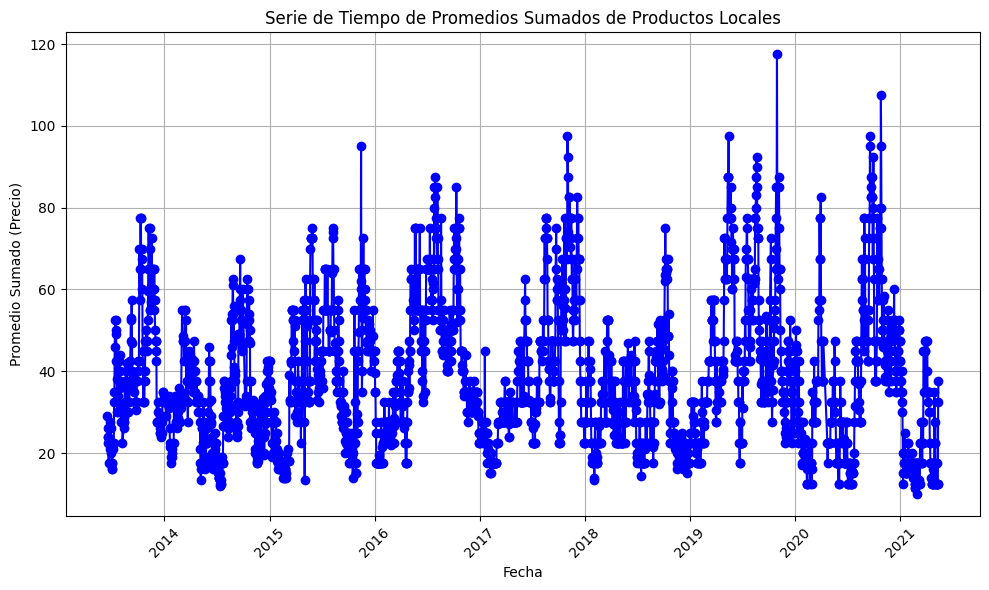

In [7]:
# Graficar serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(serie_tiempo['Date'], serie_tiempo['Average'], marker='o', linestyle='-', color='b')
plt.title('Serie de Tiempo de Promedios Sumados de Productos Locales')
plt.xlabel('Fecha')
plt.ylabel('Promedio Sumado (Precio)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

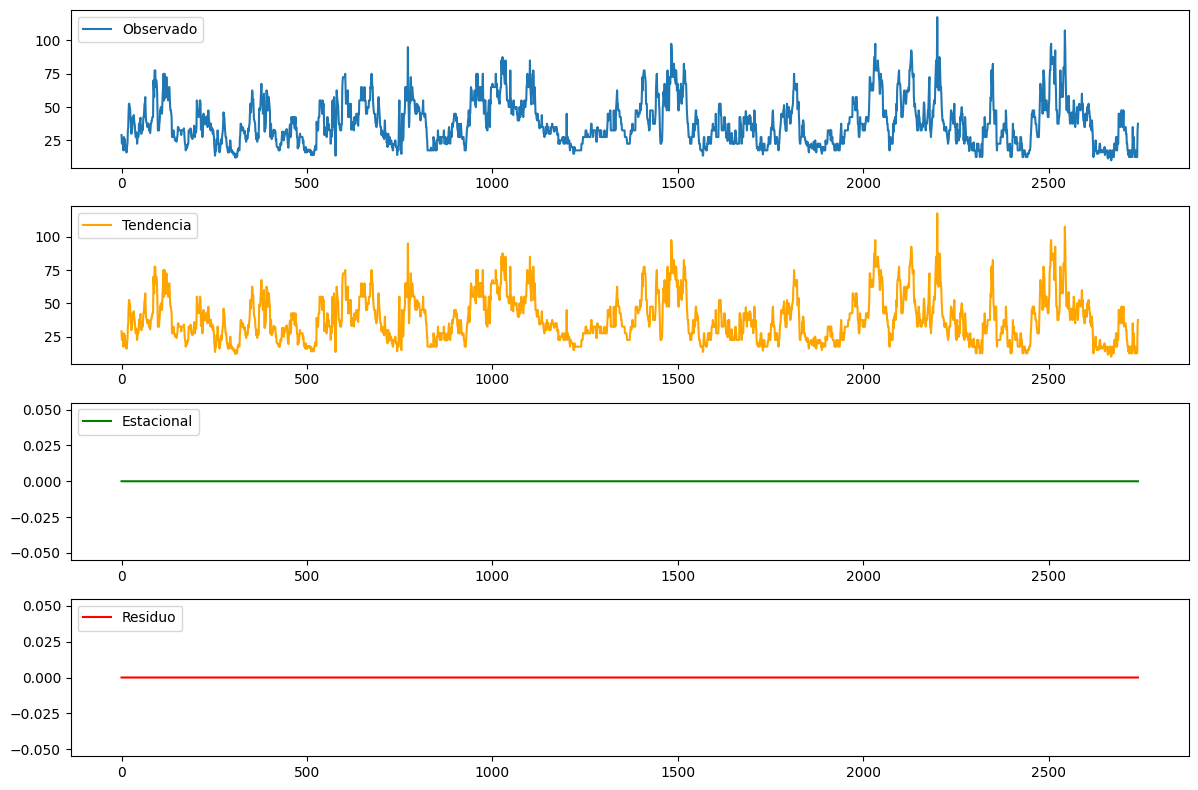

In [8]:
# Realizar descomposición de la señal, utilizado seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Realizar la descomposición de la señal
result = seasonal_decompose(serie_tiempo['Average'], model='additive', period=1)

# Graficar los componentes de la descomposición
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(result.observed, label='Observado')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Tendencia', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Estacional', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residuo', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [9]:
# Realizar Hold Out de 80/20
train_size = int(len(serie_tiempo) * 0.8)
train, test = serie_tiempo[:train_size], serie_tiempo[train_size:]

#### **1.2 Modelo Prophet**

A continuación se genera un modelo Prophet para la predicción. Para ello se tiene que:
1. Crear dataset, donde columna de tiempo tiene que ir en formate YYYY-MM-DD con el nombre de `ds` y columna objetivo con nombre `y`.
2. Entrenar modelo.
3. Generar predicción. Notar que el dataframe de predicción solo contiene una columna con nombre `ds`, al inicio.

In [ ]:
#instalamos prophet
!pip install prophet

In [10]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


**1. Generar dataframes de entrenamiento y testeo**

In [11]:
# Respuesta
df_train = train.rename(columns={'Date': 'ds', 'Average': 'y'})

**2. Modelo y entrenamiento**

In [12]:
# Respuesta, tal vez si menciono más arriba que prophet usar la sintaxis de sklearn esto lo hacen solitos nomas
model = Prophet()
model.fit(df_train)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo65yse7p/y7ocr6mi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo65yse7p/75l7e6mt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29015', 'data', 'file=/tmp/tmpo65yse7p/y7ocr6mi.json', 'init=/tmp/tmpo65yse7p/75l7e6mt.json', 'output', 'file=/tmp/tmpo65yse7p/prophet_modelc_lm_ptu/prophet_model-20240526135841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:58:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:58:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**3. Predicción.**

¿Qué muestra el dataframe de predicción una vez realizada la predicción? ¿Qué siginifican las distintas columnas?

In [13]:
# Respuesta
future = test[['Date']].rename(columns={'Date': 'ds'})

# Generar predicciones
forecast = model.predict(future)

In [14]:
# Mostrar las primeras filas del forecast
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-10-23,47.116697,38.294789,72.259862,47.116697,47.116697,8.265423,8.265423,8.265423,0.108671,0.108671,0.108671,8.156752,8.156752,8.156752,0.0,0.0,0.0,55.382120
1,2019-10-24,47.146767,39.101367,71.838289,47.146767,47.146767,7.657881,7.657881,7.657881,-0.368759,-0.368759,-0.368759,8.026641,8.026641,8.026641,0.0,0.0,0.0,54.804648
2,2019-10-25,47.176837,38.113471,71.552656,47.176837,47.176837,8.115084,8.115084,8.115084,0.220800,0.220800,0.220800,7.894284,7.894284,7.894284,0.0,0.0,0.0,55.291921
3,2019-10-26,47.206907,37.847848,71.971199,47.206907,47.206907,7.507679,7.507679,7.507679,-0.252694,-0.252694,-0.252694,7.760373,7.760373,7.760373,0.0,0.0,0.0,54.714586
4,2019-10-27,47.236977,38.520725,71.007933,47.236977,47.236977,7.783466,7.783466,7.783466,0.157918,0.157918,0.157918,7.625549,7.625549,7.625549,0.0,0.0,0.0,55.020444


1. yhat: Esta es la columna más importante, ya que contiene las predicciones finales del modelo para cada fecha.
2. yhat_lower y yhat_upper: Estas columnas contienen los intervalos de predicción inferior y superior, respectivamente. Proveen un rango en el que es probable que se encuentre el valor real con una cierta confianza (normalmente 80% o 95%).
3. additive_terms: Esta columna muestra la suma de todos los términos aditivos (como tendencia, estacionalidad semanal y anual).
4. weekly y yearly: Estas columnas muestran los componentes estacionales semanales y anuales, respectivamente. Representan los patrones repetitivos que ocurren semanal o anualmente.
5. multiplicative_terms: Esta columna generalmente será cero en el modelo aditivo, pero en modelos multiplicativos, mostraría el efecto multiplicativo de los componentes estacionales y otros.
6. trend_lower y trend_upper: Estas columnas contienen los intervalos de predicción inferior y superior para la tendencia.
7. additive_terms_lower y additive_terms_upper: Estas columnas muestran los intervalos de predicción inferior y superior para los términos aditivos.
8. weekly_lower y weekly_upper: Estas columnas contienen los intervalos de predicción inferior y superior para la componente estacional semanal.
9. yearly_lower y yearly_upper: Estas columnas contienen los intervalos de predicción inferior y superior para la componente estacional anual.



**Gráficos de resultados**


Ahora, vemos el resultado de la predicción hecha a través de los gráficos que vienen implementados en la libreria.

Se tienen gráficos de la predicción del modelo y descomposición por componentes.

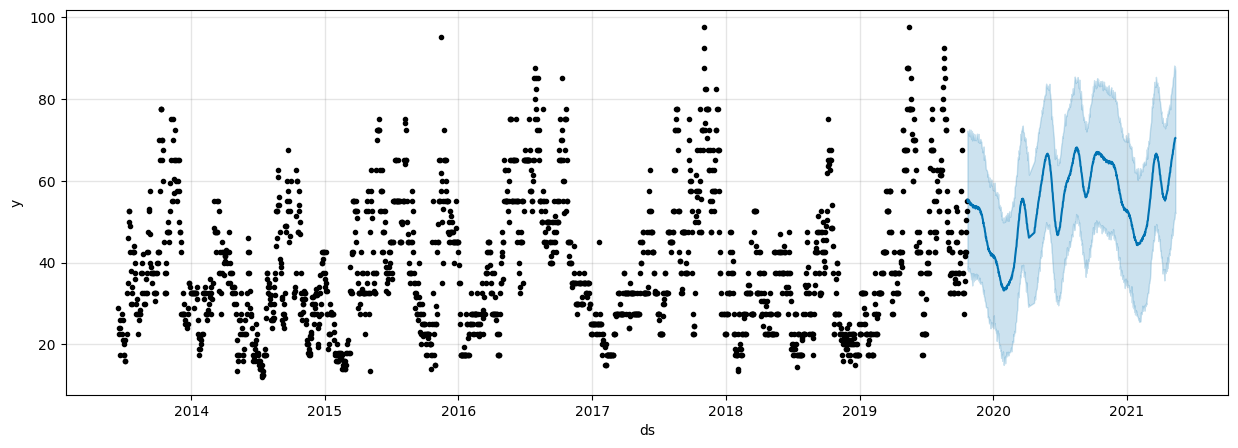

In [15]:
# plot forecast, estático.
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast, ax=ax)
plt.show()

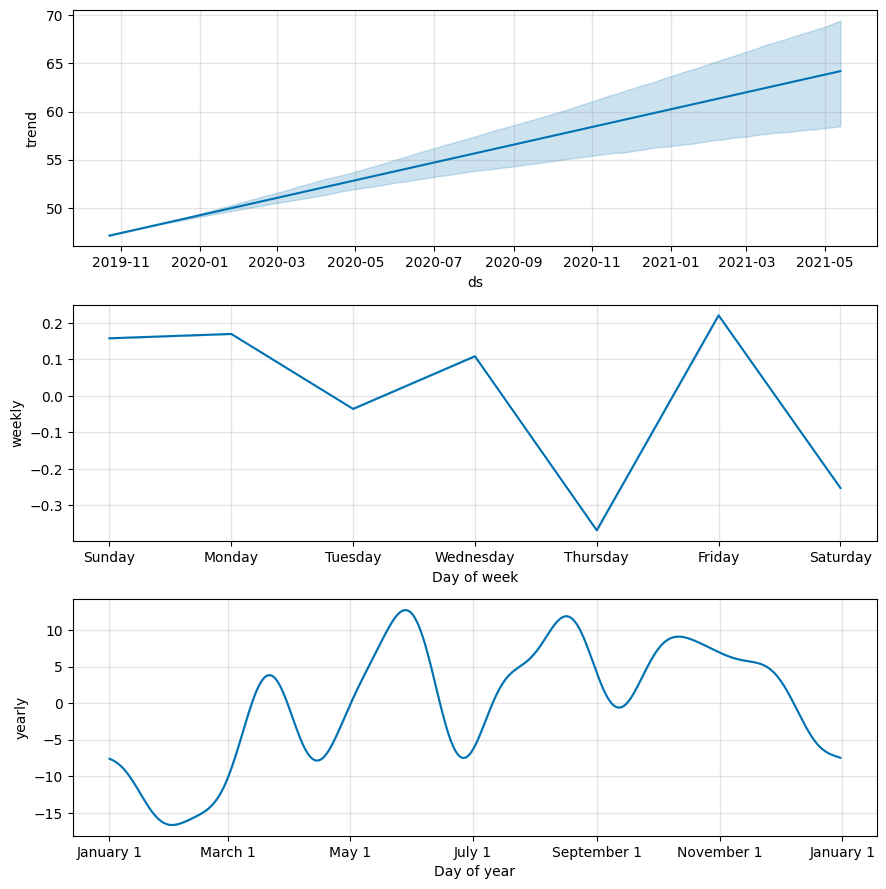

In [16]:
# descomposición por componentes, estático
fig = model.plot_components(forecast)

#### **1.3 Resultados y métricas**

En la presente sección se van a ver los resultados de la predicción, comparando con los resultados originales, así se obtienen métricas de error. Para ello se hacen los siguientes pasos:
1. Inspeccionar gráfica de predicción con los datos reales. Agregar tres vistas: predicción del primer 15% de los datos, 50% de los datos y 100% de la predicción.
2. Calcular métricas de error (RMSE, MAE, MAPE).

In [17]:
# Realizar la fusión de los DataFrames para hacer gráficos y cálculos
comparison_df = test.merge(forecast[['ds', 'yhat']], left_on='Date', right_on='ds', how='left')

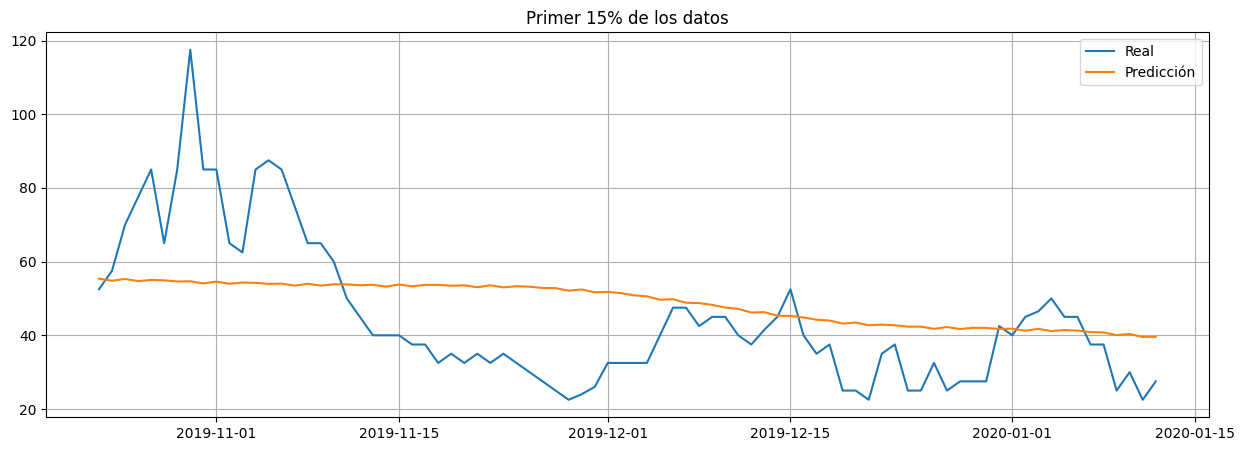

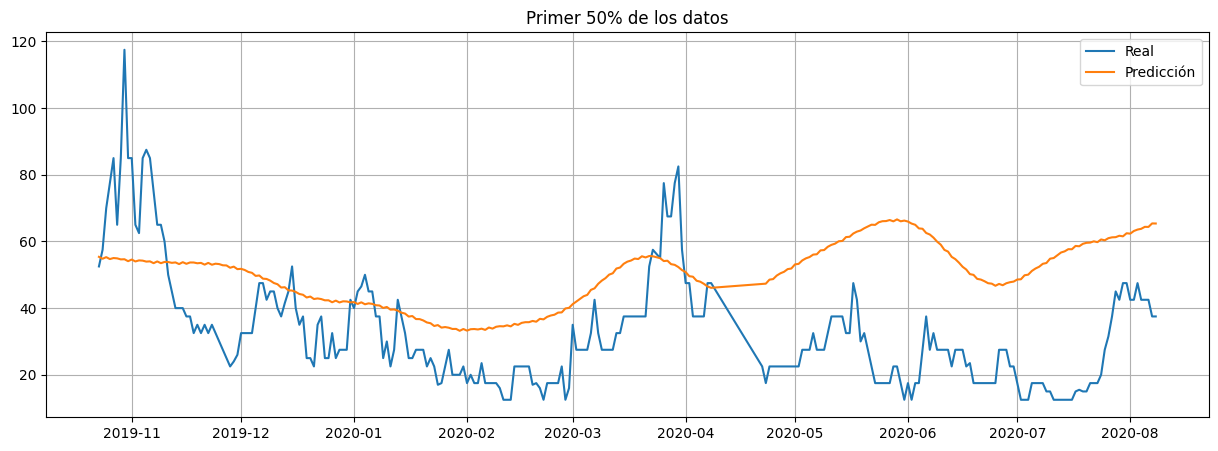

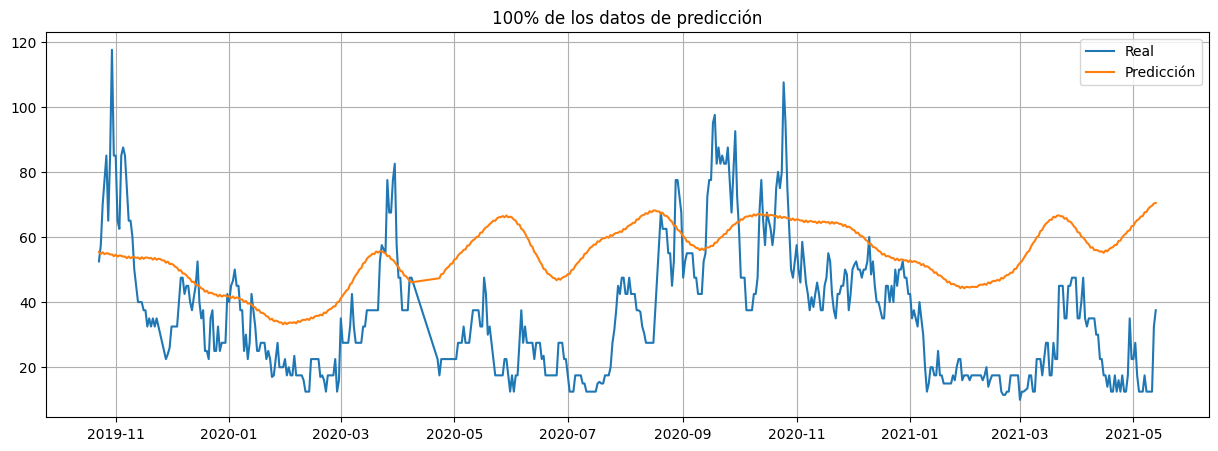

In [18]:
# Respuesta

#1. Datos con predicción 15%,50%,100%

# Definir los tamaños para las vistas
size_15 = int(len(comparison_df) * 0.15)
size_50 = int(len(comparison_df) * 0.50)
size_100 = len(comparison_df)

# Crear las vistas
comparison_15 = comparison_df.iloc[:size_15]
comparison_50 = comparison_df.iloc[:size_50]
comparison_100 = comparison_df

# Graficar las tres vistas
plt.figure(figsize=(15, 5))
plt.plot(comparison_15['Date'], comparison_15['Average'], label='Real')
plt.plot(comparison_15['Date'], comparison_15['yhat'], label='Predicción')
plt.title('Primer 15% de los datos')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(comparison_50['Date'], comparison_50['Average'], label='Real')
plt.plot(comparison_50['Date'], comparison_50['yhat'], label='Predicción')
plt.title('Primer 50% de los datos')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(comparison_100['Date'], comparison_100['Average'], label='Real')
plt.plot(comparison_100['Date'], comparison_100['yhat'], label='Predicción')
plt.title('100% de los datos de predicción')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#2 cálculos de métricas
rmse = np.sqrt(mean_squared_error(comparison_df['Average'], comparison_df['yhat']))
mae = mean_absolute_error(comparison_df['Average'], comparison_df['yhat'])
mape = np.mean(np.abs((comparison_df['Average'] - comparison_df['yhat']) / comparison_df['Average'])) * 100

# Imprimir las métricas de error
rmse, mae, mape

(26.103251858324878, 22.651489690162283, 100.28373624599651)

#### **1.4 Festividades y fechas importantes**

Como a todos, a Don Sergio también le afectan las fechas importantes. Para ver como afectan estas fechas al presupuesto de Don Sergio tiene que realizar las siguientes tareas:

1. Crear dataframe con fechas importantes y agregar las al modelo con el argumento `holiday`.
2. Predecir las el dataframe de testeo
3. Comparar resultados. Hacer una tabla con resultados RMSE, MAE, MAPE anteriores y al añadir las festividades.


**1. Festividades y agregar a modelo**

In [37]:
# Rango de años para generar las fechas importantes
start_year = 2013
end_year = 2021

# Fechas importantes anuales
annual_dates = [
    ('12-25', 'Navidad'),
    ('01-01', 'Año Nuevo'),
    ('02-14', 'Día de San Valentín'),
    ('05-01', 'Día del Trabajo')
]

# Generar las fechas importantes anuales para cada año en el rango
fechas_importantes = []
for year in range(start_year, end_year + 1):
    for date, name in annual_dates:
        fechas_importantes.append(f"{year}-{date}")

# Agregar las vacaciones de invierno en Chile (24 de junio al 8 de julio) para cada año en el rango
for year in range(start_year, end_year + 1):
    fechas_importantes.extend(pd.date_range(start=f'{year}-06-24', end=f'{year}-07-08').strftime('%Y-%m-%d').tolist())

# Agregar las vacaciones de verano en Chile (1 de enero al 1 de marzo) para cada año en el rango
for year in range(start_year, end_year + 1):
    fechas_importantes.extend(pd.date_range(start=f'{year}-01-01', end=f'{year}-03-01').strftime('%Y-%m-%d').tolist())

# Convertir las fechas a un DataFrame
fechas_importantes_df = pd.DataFrame({
    'ds': pd.to_datetime(fechas_importantes),
    'holiday': 'important_day'
})

# Agregar columnas de ventana inferior y superior
fechas_importantes_df['lower_window'] = 0
fechas_importantes_df['upper_window'] = 1

In [38]:
# Ajustar el modelo Prophet con las festividades
model_holiday = Prophet(holidays=fechas_importantes_df)
model_holiday.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo65yse7p/f84jp9pz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo65yse7p/tt9y7i2z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53983', 'data', 'file=/tmp/tmpo65yse7p/f84jp9pz.json', 'init=/tmp/tmpo65yse7p/tt9y7i2z.json', 'output', 'file=/tmp/tmpo65yse7p/prophet_modeli3o0417w/prophet_model-20240526140925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:09:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:09:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**2. Predecir**

In [44]:
#Predecir
# Generar predicciones
forecast_holiday = model_holiday.predict(future)

In [45]:
forecast_holiday.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-10-23,46.959200,37.545402,71.599504,46.959200,46.959200,8.148485,8.148485,8.148485,0.0,...,0.109444,0.109444,0.109444,8.039041,8.039041,8.039041,0.0,0.0,0.0,55.107685
1,2019-10-24,46.988127,37.928254,70.593675,46.988127,46.988127,7.539488,7.539488,7.539488,0.0,...,-0.368153,-0.368153,-0.368153,7.907641,7.907641,7.907641,0.0,0.0,0.0,54.527615
2,2019-10-25,47.017054,39.566539,73.832986,47.017054,47.017054,7.989919,7.989919,7.989919,0.0,...,0.217471,0.217471,0.217471,7.772448,7.772448,7.772448,0.0,0.0,0.0,55.006973
3,2019-10-26,47.045981,38.302972,71.128707,47.045981,47.045981,7.391832,7.391832,7.391832,0.0,...,-0.242338,-0.242338,-0.242338,7.634170,7.634170,7.634170,0.0,0.0,0.0,54.437813
4,2019-10-27,47.074908,37.788120,71.528162,47.074908,47.074908,7.646606,7.646606,7.646606,0.0,...,0.153094,0.153094,0.153094,7.493511,7.493511,7.493511,0.0,0.0,0.0,54.721514


**3. Resultados**

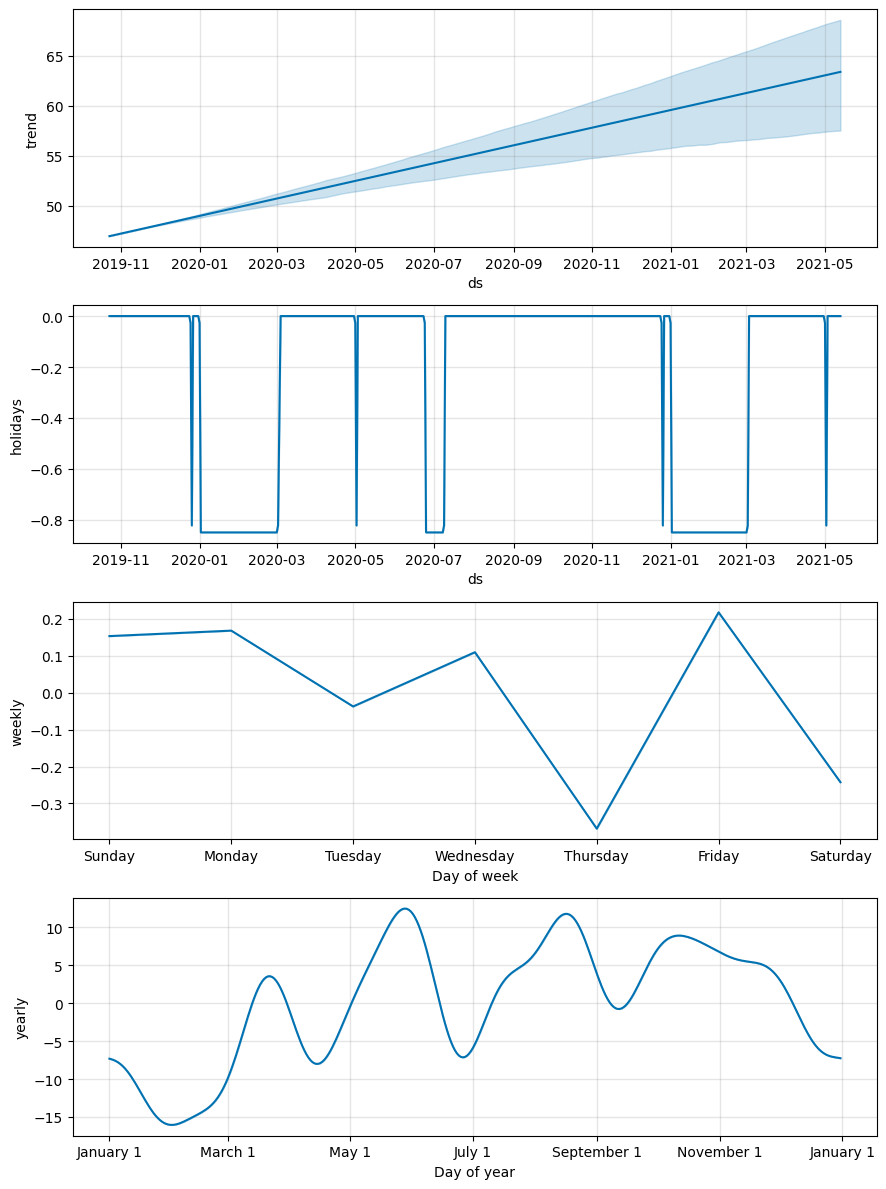

In [46]:
# Respuesta
#plot de componentes
fig_holiday = model_holiday.plot_components(forecast_holiday)


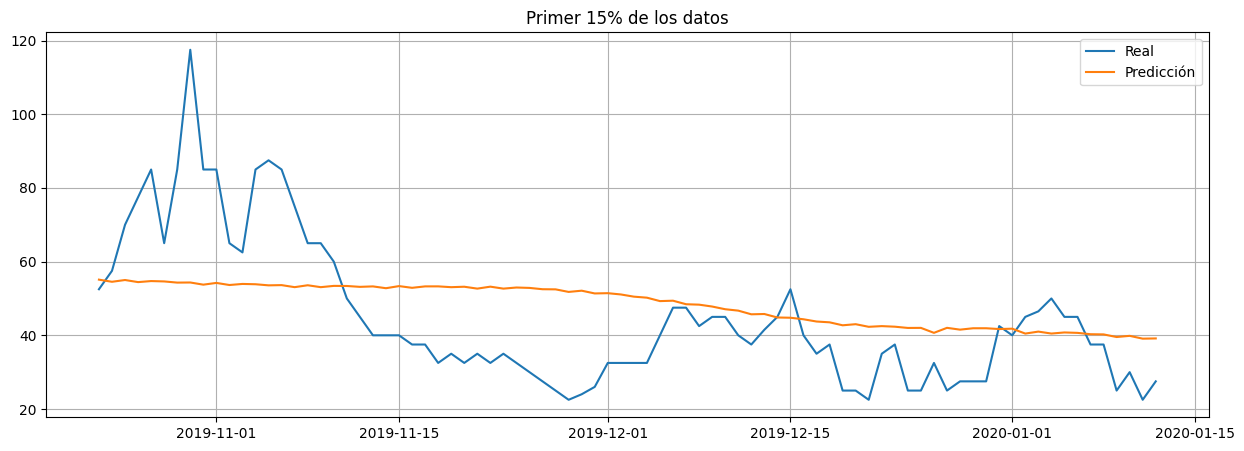

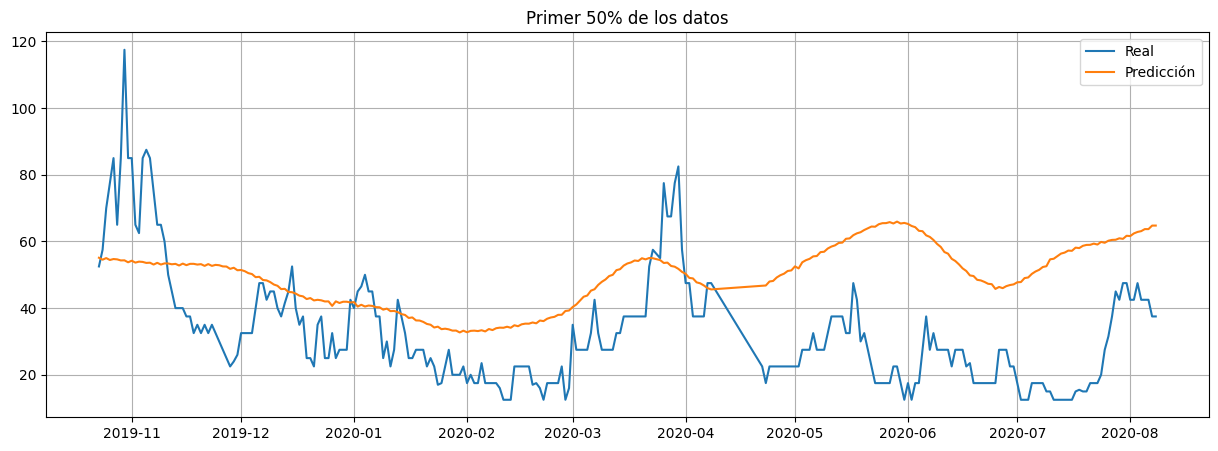

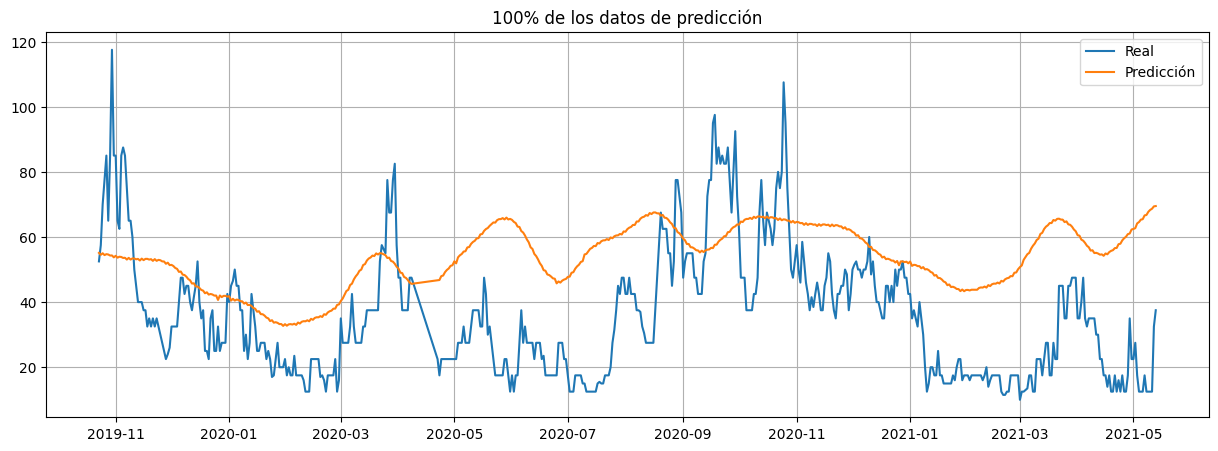

In [41]:
# Realizar la fusión de los DataFrames para las predicciones con festividades
comparison_df_holidays = test.merge(forecast_holiday[['ds', 'yhat']], left_on='Date', right_on='ds', how='left')

# Definir los tamaños para las vistas
size_15 = int(len(comparison_df_holidays) * 0.15)
size_50 = int(len(comparison_df_holidays) * 0.50)
size_100 = len(comparison_df_holidays)

# Crear las vistas
comparison_15 = comparison_df_holidays.iloc[:size_15]
comparison_50 = comparison_df_holidays.iloc[:size_50]
comparison_100 = comparison_df_holidays

# Graficar las tres vistas
plt.figure(figsize=(15, 5))
plt.plot(comparison_15['Date'], comparison_15['Average'], label='Real')
plt.plot(comparison_15['Date'], comparison_15['yhat'], label='Predicción')
plt.title('Primer 15% de los datos')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(comparison_50['Date'], comparison_50['Average'], label='Real')
plt.plot(comparison_50['Date'], comparison_50['yhat'], label='Predicción')
plt.title('Primer 50% de los datos')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(comparison_100['Date'], comparison_100['Average'], label='Real')
plt.plot(comparison_100['Date'], comparison_100['yhat'], label='Predicción')
plt.title('100% de los datos de predicción')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
#Resultados:
# Calcular las métricas de error para las predicciones con festividades
rmse_holidays = np.sqrt(mean_squared_error(comparison_df_holidays['Average'], comparison_df_holidays['yhat']))
mae_holidays = mean_absolute_error(comparison_df_holidays['Average'], comparison_df_holidays['yhat'])
mape_holidays = np.mean(np.abs((comparison_df_holidays['Average'] - comparison_df_holidays['yhat']) / comparison_df_holidays['Average'])) * 100

In [43]:
resultados_comparacion = pd.DataFrame({
    'Métrica': ['RMSE', 'MAE', 'MAPE'],
    'Sin Festividades': [rmse, mae, mape],
    'Con Festividades': [rmse_holidays, mae_holidays, mape_holidays]
})

print(resultados_comparacion)

  Métrica  Sin Festividades  Con Festividades
0    RMSE         26.103252         25.575378
1     MAE         22.651490         22.122407
2    MAPE        100.283736         97.933292


¿Son más precisas las predicciones? ¿Qué otro festividad podría afectar a los precios de las frutas y verduras?

En todos los casos, los valores de las métricas de error (RMSE, MAE, MAPE) son más bajos cuando se incluyen las festividades en el modelo. Esto indica que el modelo que considera las festividades hace un mejor trabajo al predecir los precios de las frutas y verduras.

Estas otras festividades pueden también ser de aporte:

1. Día de la Madre (segundo domingo de mayo) y Día del Padre (tercer domingo de junio): Las compras de alimentos frescos pueden aumentar para celebraciones familiares.
2. Fiestas Patrias en Chile (18 y 19 de septiembre): Esta es una de las festividades más importantes en Chile y suele haber un aumento significativo en la compra de alimentos.


#### **1.5 Regresores adicionales**


Don Sergio sabe que la fruta y la verdura tiene temporadas y que por eso hay fechas en que hay ciertas cosas más caras que otras. Además, sabe que este tipo de alimentos sube de precio en invierno, por lo que necesita que tenga en cuenta estas fechas.


---
 Para lograr lo anterior tendrán que:
 1. Crear regresor con 1 y 0's según corresponda, para las fechas de invierno. Tomar invierno desde el 21/junio hasta el 21/septiembre de todos los años.
 2. Agregar columna con el regresor tanto al dataframe original como al de testeo
 3. Entrenar y predecir. Gráficar resultados.

In [68]:
# Rango de años para generar las fechas de invierno
start_year = 2013
end_year = 2023

# Crear el regresor de invierno
def is_winter(date):
    if date >= pd.Timestamp(year=date.year, month=6, day=21) and date <= pd.Timestamp(year=date.year, month=9, day=21):
        return 1
    else:
        return 0


# Agregar la columna de invierno al DataFrame original
df_train_winter=df_train.copy()
df_train_winter['winter'] = df_train_winter['ds'].apply(is_winter)


# Entrenar el modelo Prophet con el regresor de invierno
model_winter = Prophet()
model_winter.add_regressor('winter')
model_winter.fit(df_train_winter)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo65yse7p/ju9o892y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo65yse7p/etlvkkui.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32649', 'data', 'file=/tmp/tmpo65yse7p/ju9o892y.json', 'init=/tmp/tmpo65yse7p/etlvkkui.json', 'output', 'file=/tmp/tmpo65yse7p/prophet_modelrx7ktfg3/prophet_model-20240526142819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [69]:
# Agregar la columna de invierno al DataFrame de prueba
future_winter=future.copy()
future_winter['winter'] = future_winter['ds'].apply(is_winter)

In [72]:
forecast_winter= model_winter.predict(future_winter)

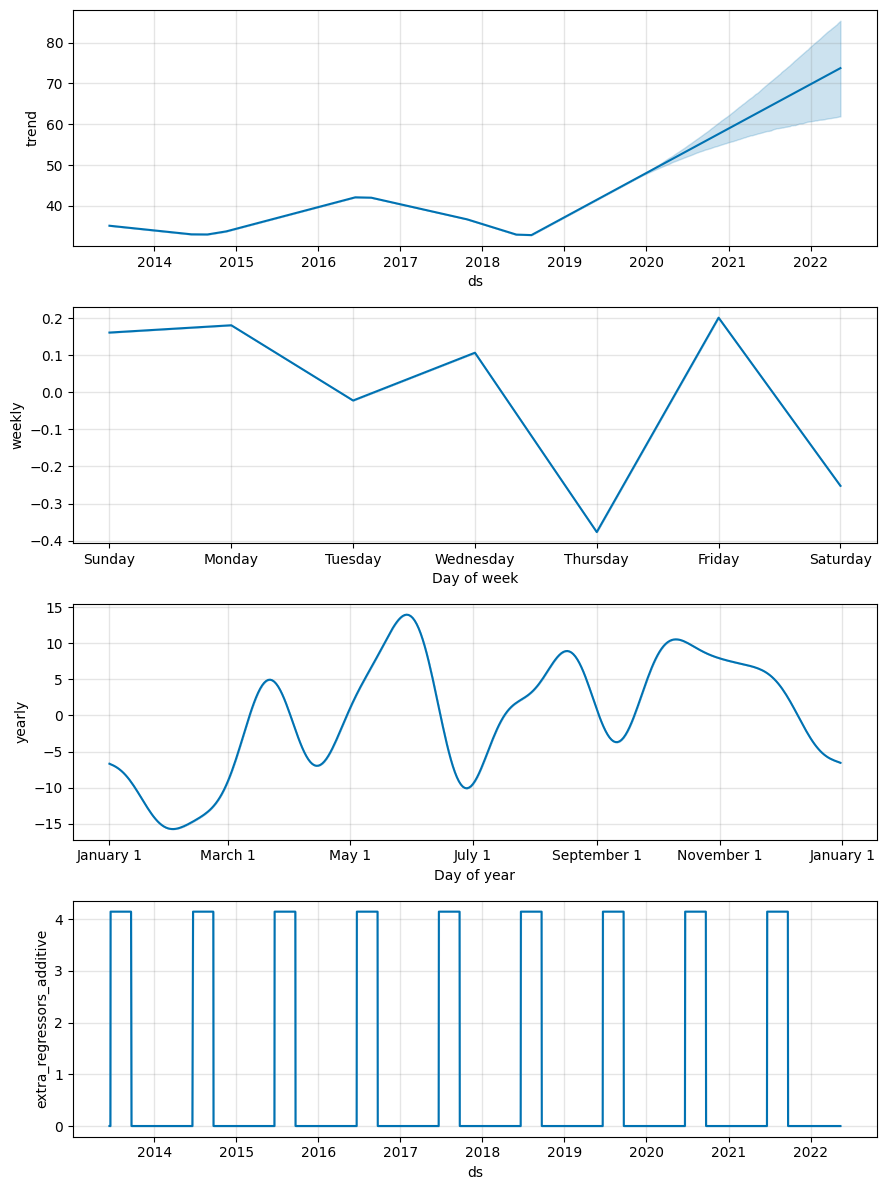

In [74]:
#plot de componentes
fig_winter = model_winter.plot_components(forecast_winter)


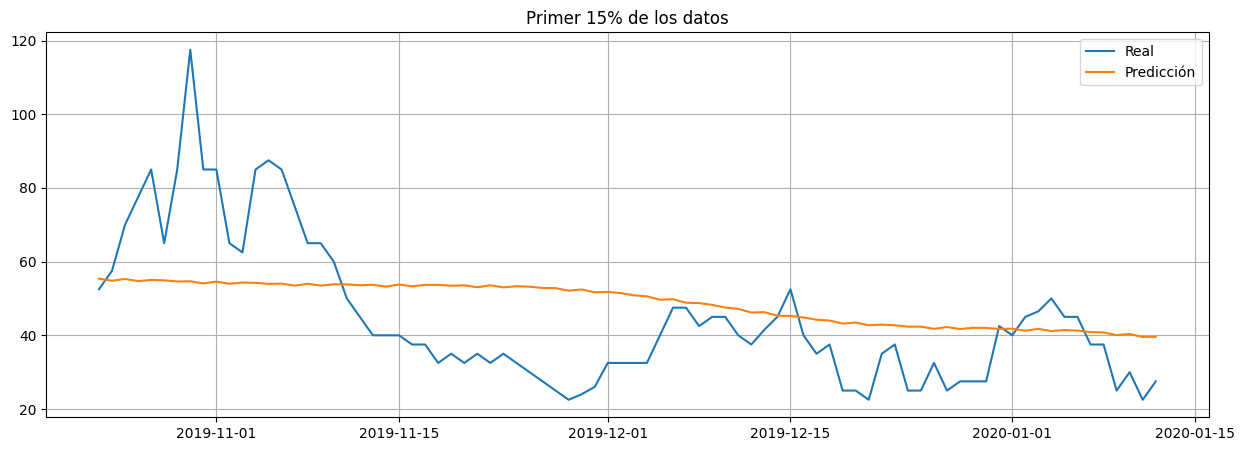

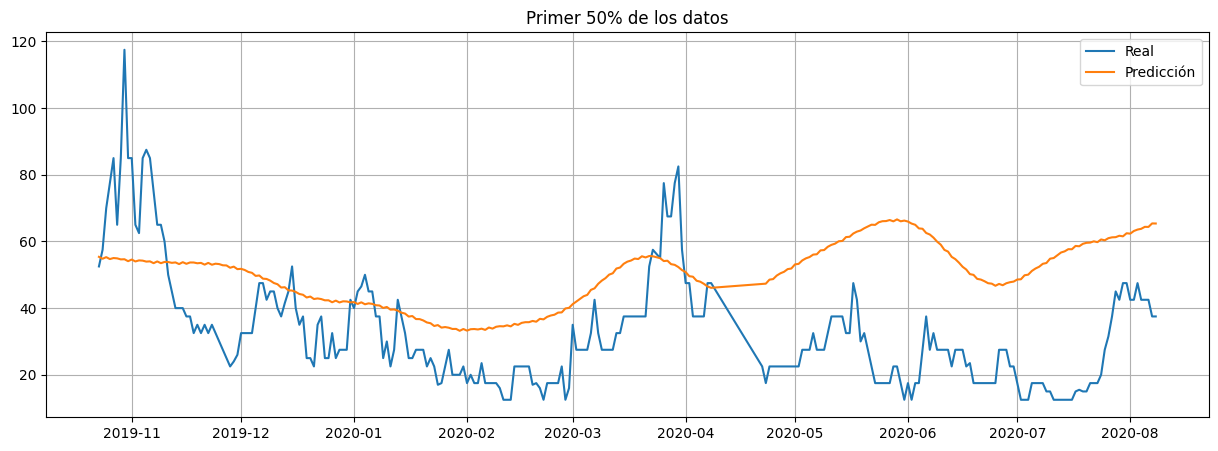

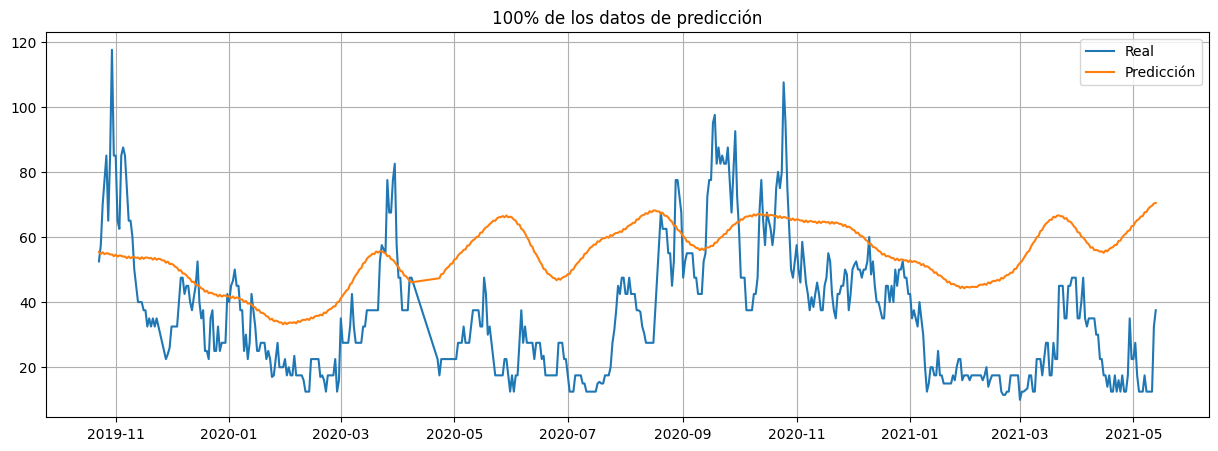

In [75]:
# Realizar la fusión de los DataFrames para las predicciones con el regresor de invierno
comparison_df_winter = test.merge(forecast[['ds', 'yhat']], left_on='Date', right_on='ds', how='left')

# Definir los tamaños para las vistas
size_15 = int(len(comparison_df_winter) * 0.15)
size_50 = int(len(comparison_df_winter) * 0.50)
size_100 = len(comparison_df_winter)

# Crear las vistas
comparison_15 = comparison_df_winter.iloc[:size_15]
comparison_50 = comparison_df_winter.iloc[:size_50]
comparison_100 = comparison_df_winter

# Graficar las tres vistas
plt.figure(figsize=(15, 5))
plt.plot(comparison_15['Date'], comparison_15['Average'], label='Real')
plt.plot(comparison_15['Date'], comparison_15['yhat'], label='Predicción')
plt.title('Primer 15% de los datos')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(comparison_50['Date'], comparison_50['Average'], label='Real')
plt.plot(comparison_50['Date'], comparison_50['yhat'], label='Predicción')
plt.title('Primer 50% de los datos')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(comparison_100['Date'], comparison_100['Average'], label='Real')
plt.plot(comparison_100['Date'], comparison_100['yhat'], label='Predicción')
plt.title('100% de los datos de predicción')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
# Calcular las métricas de error para las predicciones con festividades
rmse_winter = np.sqrt(mean_squared_error(comparison_df_winter['Average'], comparison_df_winter['yhat']))
mae_winter = mean_absolute_error(comparison_df_winter['Average'], comparison_df_winter['yhat'])
mape_winter = np.mean(np.abs((comparison_df_winter['Average'] - comparison_df_winter['yhat']) / comparison_df_winter['Average'])) * 100

In [77]:
rmse_winter,mae_winter,mape_winter

(26.103251858324878, 22.651489690162283, 100.28373624599651)

# **Sistemas de Recomendación (3.0 puntos)**

<center>
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Shopping_online_with_bank_card.jpg/1024px-Shopping_online_with_bank_card.jpg" / width = 350>

Como no todo en la vida es correr y nutrirse, don Sergio desarrollo el hábito de comprar online y pasa horas y horas en Amazon viendo distintos objetos que le podrían servir, pero no sabe qué comprar, por lo que usted tendrá que ayudarlo a buscar los elementos más comprados por sus amigos para que él también pueda probarlos.

---

Las tareas a realizar son:

1. Limpiar y explorar el dataset.
2. Recomendación por Ranking (baseline).
3. Recomendación basada en filtros colaborativos por usuarios.
4. Recomendaciones basadas en filtros colaborativos por items.



In [ ]:
# se instala surprise library
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357254 sha256=7700a68f5a26c539c85c7cb0d7e69b0c4e39ae94062fbf02cefd5dd08948ad7c
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD

import pandas as pd
from copy import deepcopy

Los datos presentan las siguientes columnas:
* `iderId`: ID único de cada usuario
* `productId:` ID único de cada producto
* `Rating:` Rating que un usuario le dio a un producto
* `timestamp:` Fecha del rating

In [ ]:
df = pd.read_parquet('ratings_Electronics.parquet')
df.head()

,user_id,prod_id,rating
189,3188,0,5.0
200,4980,0,4.0
314,5374,0,5.0
389,6293,0,5.0
406,4879,0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164007 entries, 189 to 7824221
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  164007 non-null  int64  
 1   prod_id  164007 non-null  int64  
 2   rating   164007 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 5.0 MB


### **2.1.2 EDA (0.5 puntos)**

Habiendo limpiado los datos, generemos un pequeño análisis exploratorio:

Reportar la cantidad de usuarios y productos únicos:

In [ ]:
user_unique = df['user_id'].nunique()
prod_unique = df['prod_id'].nunique()
print(f"Usuarios unicos: {user_unique}")
print(f"Productos unicos: {prod_unique}")

Usuarios unicos: 8014
Productos unicos: 6727


Verificar que no hayan valores nulos

In [ ]:
null_values = df.isnull().sum()
print(f"Valores nulos:\n{null_values}")

Valores nulos:
user_id    0
prod_id    0
rating     0
dtype: int64


Graficar distribución de los ratings

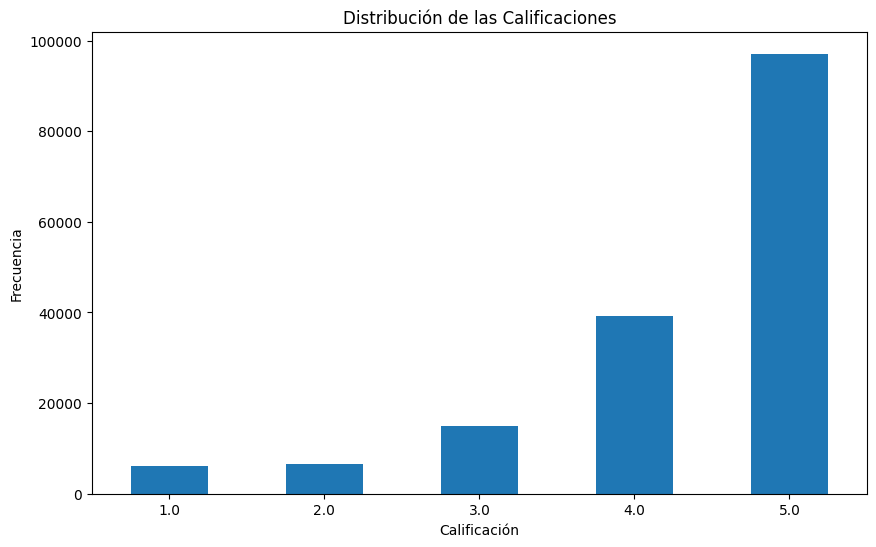

In [ ]:
plt.figure(figsize=(10, 6))
df['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de las Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

Reportar las siguientes listas:

- Top 5 de usuarios con mayores interacciones
- Top 5 de productos con mayores inteacciones

In [ ]:
# Top 5 usuarios con mayores interacciones
top_5_users = df['user_id'].value_counts().head(5)
print(f"Top 5 usuarios con mayores interacciones:\n{top_5_users}")

# Top 5 productos con mayores interacciones
top_5_prods = df['prod_id'].value_counts().head(5)
print(f"Top 5 productos con mayores interacciones:\n{top_5_prods}")


Top 5 usuarios con mayores interacciones:
user_id
6703    283
5732    217
6273    206
1414    199
4665    179
Name: count, dtype: int64
Top 5 productos con mayores interacciones:
prod_id
5130    611
2843    542
5244    395
2525    371
6290    362
Name: count, dtype: int64


A partir de sus respuestas, escriba al menos 3 conclusiones.

Escriba sus observaciones aquí:

1. Observando las distribuciones de calificaciones, existe una tendendia de los usuarios a calificar con valoraciones altas, 4 o 5. Esto genera un imbalance entre calificacioens.
2. El usuario con el mayor número de interacciones tiene 283 calificaciones, lo que indica un alto nivel de actividad en comparación con otros usuarios. Los top 5 usuarios representan una proporción significativa de las interacciones totales, lo que sugiere que un pequeño grupo de usuarios muy activos contribuye de manera desproporcionada al total de calificaciones.
3. El producto más calificado recibió 611 interacciones, lo que muestra una alta popularidad en comparación con otros productos. Los top 5 productos también tienen un número notablemente alto de calificaciones, lo que puede indicar productos populares o con una base de usuarios fiel. Esto puede ser útil para identificar productos clave que impulsan la participación y la satisfacción del usuario.

## **2.2 Holdout**

Con los datos procesados, separe los datos de entrenamiento en train y test asignando 30% de los datos para el conjunto de test. Para replicabilidad de sus respuestas, fije la semilla en `42`.

In [ ]:
reader = Reader(rating_scale=(1,5))

df_collaborative = df[['user_id', 'prod_id', 'rating']].copy() # ordenamos dataset en user, producto, rating (paso clave para trabajar con Surprise)
dataset = Dataset.load_from_df(df_collaborative, reader) # generamos Dataset de Surprise


In [ ]:
from surprise.model_selection import train_test_split

train_df, test_df = train_test_split(dataset, test_size=0.30, random_state=42)
train_df

In [ ]:
test_df[:10]

[(2170, 4363, 5.0),
 (6665, 5810, 4.0),
 (3315, 5232, 4.0),
 (2051, 2892, 5.0),
 (6170, 2929, 5.0),
 (132, 401, 4.0),
 (5449, 1774, 5.0),
 (5954, 6010, 5.0),
 (1607, 4630, 5.0),
 (6546, 5245, 5.0)]

## **2.3 Baseline**

El objetivo de esta sección es generar un *baseline* en las recomendaciones a partir de una aproximación *dummy* para resolver el problema de recomendación. En particular, se le pide lo siguiente:
- Entrenar modelo baseline `NormalPredictor` de `surprise` con los datos de entrenamiento
- Generar predicciones usando el modelo entrenado
- Evaluar predicciones usando el error cuadrático medio. Entregue una interpretación de su resultado

In [ ]:
from surprise.prediction_algorithms.random_pred import NormalPredictor

# Train NormalPredictor model
model = NormalPredictor()
model.fit(train_df)

# Predicciones en Test
predictions = model.test(test_df)

In [ ]:
# Evaluar con MAE
rmse = accuracy.rmse(predictions)
mse = accuracy.mse(predictions)
mae = accuracy.mae(predictions)

RMSE: 1.3359
MSE: 1.7845
MAE:  0.9909


Dado que los datos presentan una proporción mayor de casos en calificaciones altas, se utiliza MSE, que es más afín a datasets sesgados.

En este caso, el valor de MSE es de 1.78, indicando que el modelo está equivocado por la raíz cuadrada de 1.78, que es 1.35, comparado a la calificación real.

Teniendo en cuenta que el rango de calificaciones es de 1 a 5, un error de 1.34 puntos no es lo óptimo, pero razonable para un modelo Baseline.


## **Filtros Colaborativos Basados en Memoria**

A modo de mejorar esta sección, se le pide que implementar filtros colaborativos basados en memoria por medio de algoritmos basados en KNN. En específico, se le pide implementar:
- Filtro Colaborativo KNN enfocado en el Usuario
- Filtro Colaborativo KNN enfocado en el Producto
- Use `KNNBasic` y similitud coseno para ambos modelos

Luego **para cada uno de los modelos**, responda:

- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Qué enfoque tienen un mejor rendimiento? ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

*Hint: Le podría servir apoyarse de esta [documentación](https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration).*

In [ ]:
def get_user_top_k(predictions, user, k = 10):

  # predecir los rating filtrados por usuario user
  predicted_ratings = [pred for pred in predictions if pred.uid == user]

  # Ordenar las predicciones
  sorted_predicted_ratings = sorted(predicted_ratings, key=lambda x: x.est, reverse=True)

  return sorted_predicted_ratings[:k]

In [ ]:
from surprise.accuracy import mse

# entrenar algoritmo

sim_options = {'name': 'cosine',
               'user_based': True}

# algoritmo base a usuario.
user_model = KNNBasic(sim_options=sim_options)

# entrenar
user_model.fit(train_df)

#predecir en dataframe de testeo

predictions = user_model.test(test_df) # retornar un dataframe con el rating estimado para cada (user_id, item_id)

# obtener mse
user_mse = mse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
MSE: 1.2122


In [ ]:
# ejemplo
example = [(3, 3906, None)]
print(user_model.test(example))
get_user_top_k(predictions, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=3.381966011250105, details={'actual_k': 3, 'was_impossible': False})]


[Prediction(uid=2170, iid=2679, r_ui=4.0, est=5, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid=2170, iid=1326, r_ui=5.0, est=4.799755049750801, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=2170, iid=4650, r_ui=5.0, est=4.399861310283875, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=2170, iid=1692, r_ui=4.0, est=4.333333333333333, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=2170, iid=4363, r_ui=5.0, est=4.199459547276517, details={'actual_k': 15, 'was_impossible': False})]

In [ ]:
# entrenar algoritmo base a items, obtener MSE

sim_options = {'name': 'cosine', 'user_based': False} #User_based falso implica productos

# algoritmo base a items.

item_model = KNNBasic(sim_options=sim_options)

# entrenar

item_model.fit(train_df)

#predecir en dataframe de testeo

predictions = item_model.test(test_df)

# obtener mse
user_mse = mse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
MSE: 1.2328


In [ ]:
example = [(3, 3906, None)]
print(item_model.test(example))

get_user_top_k(predictions, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=2.5, details={'actual_k': 4, 'was_impossible': False})]


[Prediction(uid=2170, iid=1692, r_ui=4.0, est=5, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid=2170, iid=1326, r_ui=5.0, est=5, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=2170, iid=2679, r_ui=4.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=2170, iid=3595, r_ui=5.0, est=4.857142857142857, details={'actual_k': 7, 'was_impossible': False}),
 Prediction(uid=2170, iid=4650, r_ui=5.0, est=4.856937449847549, details={'actual_k': 7, 'was_impossible': False})]

## **Filtros Colaborativos Basados en Modelo**

Finalmente, se le pide implementar el modelo `SVD` para resolver el problema. Al igual que en las secciones anteriores, entrene este modelo y luego evalúe sus predicciones en el conjunto de test. Luego, responda:

- ¿En qué se diferencia este tipo de modelos de los modelos basados en memoria?
- ¿Qué significa el parámetro `num_factors`? ¿De qué manera podría impactar en el ajuste del modelo?
- ¿Qué indican los parámetros $\mu$, $b_u$, $b_i$? ¿Qué cuidado se debe tener al utilizarlos?
- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

In [ ]:
# Respuesta

model = SVD()
model.fit(train_df)

# predicciones, retornar un dataframe con el rating estimado para cada (user_id, item_id)
predictions = model.test(test_df)

La diferencia entre modelos basados en memoria con modelos perteneciente a la familia de filtros colaborativos basados en modelo es que los modelos basados en memoria almacenan las interacciones de los usuarios con los elementos de una matriz de utilizad. Mientras que en estos últimos se genera una predicción para cada valor de la matriz usuario-producto a través de una descomposición matricial de la matriz objetivo.

num_factors es el número de factores latentes utilizados en la factorización de la matriz. Este parámetro podría impactar en un sobreajuste o subajuste del modelo.

Por último y al igual que otros modelos de factorización de matrices, es usual agregar términos de sesgo a la estimación, donde en este caso el término $\mu$
 representa la media de los ratings, y los coeficientes $b_u$, $b_i$ representan los coeficientes de sesgo (intercepto) para el usuario $u$ y producto $i$, respectivamente.

 Es importante que los sesgos sean estimados correctamente para evitar errores sistemáticos en las predicciones. Un sesgo mal estimado puede llevar a predicciones inexactas y a recomendaciones ineficaces.

In [ ]:
# calcular mae
from surprise.accuracy import mae
mae(predictions)

MAE:  0.6947


0.6947167605642334

In [ ]:
mse(predictions)

MSE: 0.9116


0.9115667547779508

Recordando que Baseline obtuvo
RMSE: 1.3359
MSE: 1.7845
MAE:  0.9909

Un valor de MAE 0.6947 implica una mejora en comparación con el baseline.

In [ ]:
#Rating para usuario 3 y producto 3903
model.predict(3, 3906)

Prediction(uid=3, iid=3906, r_ui=None, est=3.36610146347234, details={'was_impossible': False})

El valor para el modelo basado en KNN es de est=3.38, similar al entregado por el modelo SVD. Esta pequeña diferencia puede ser causada por las diferentes metodologias utilizadas por cada modelo, pero teniendo en cuenta que el valor de MSE es menor para SVD, se sugiere tomar en cuenta la respuesta dada por este modelo.


In [ ]:
get_user_top_k(predictions, user = 2170, k = 5)

[Prediction(uid=2170, iid=1326, r_ui=5.0, est=4.932725043382255, details={'was_impossible': False}),
 Prediction(uid=2170, iid=3595, r_ui=5.0, est=4.804842930270889, details={'was_impossible': False}),
 Prediction(uid=2170, iid=1692, r_ui=4.0, est=4.804041334427747, details={'was_impossible': False}),
 Prediction(uid=2170, iid=4650, r_ui=5.0, est=4.768286019308246, details={'was_impossible': False}),
 Prediction(uid=2170, iid=5990, r_ui=4.0, est=4.749479757995576, details={'was_impossible': False})]

Ambos modelos recomiendan los ítems 1326, 3595, 1692, y 4650 dentro de sus top 5, lo que sugiere una cierta coherencia entre las metodologías.

Las predicciones para estos ítems son bastante cercanas en valor, lo que indica que ambos modelos están capturando relaciones similares entre el usuario 2170 y estos productos

KNN tiende a predecir calificaciones más extremas (5.0) para varios ítems.
SVD proporciona estimaciones más moderadas y probablemente más precisas, como se observa en los valores ligeramente inferiores a 5.

KNN recomienda el ítem 2679, que no aparece en las recomendaciones de SVD.
SVD recomienda el ítem 5990, que no aparece en las recomendaciones de KNN.

###**Comentarios Finales**

* ¿Qué sistema de recomendación presenta mejores métricas? ¿A qué se podría deber esto?
* ¿Es posible mejorar sus resultados? Si es así, proponga al menos 2 mejoras.

El mejor modelo se obtiene de SVD, que pesenta un menor valor de MAE y MSE en comparación al modelo Baseline y el modelo basado en KNN. La regularización inherente en SVD ayuda a prevenir el sobreajuste, mejorando la generalización del modelo.

Para mejorar estos resultados se propone hacer un ajuste de hiperparametros. Se podría utilizar un GridSearchCV para optimizar hiperparametros de entrenamiento como n_epochs, learning reate, n_factor, etc.

Además, para mejorar estos resultados se propone agregar información relevante a la base de datos, combinando el modelo SVD con técnicas basadas en contenido, con información del usuario o producto.